In [1]:
columns = []
data = []
with open('./model/Input/ClimateShipping.tss') as fh:
    for i, line in enumerate(fh):
        line = line.strip()
        if i>2 and i< 183:
            line = line.split(' ', 1)[1]
            line = line.strip()
            columns.append(line)
        elif i>=183:
            line = line.split()
            line = [int(entry) for entry in line[1::]]
            data.append(line)

In [2]:
print len(data)
print len(columns)

100
180


In [3]:
hierarindex = []
for scenario_group in ['nochange', 'G', 'Wplus']:
    for i in range(1, 11):
        label = '{} {}'.format(scenario_group, i)
        
        for counts in ['<400', '400-600', '600-800', '800-1000', '1000-1200', '>1200']:
            hierarindex.append((label, counts))
hierarindex = pd.MultiIndex.from_tuples(hierarindex, names=['first', 'second'])

In [4]:
df = pd.DataFrame(data=data, columns=hierarindex)
df

first  nochange 1                                          nochange 2          \
second       <400 400-600 600-800 800-1000 1000-1200 >1200       <400 400-600   
0               0       3       1        1        18   342          0       0   
1               0       0       2       30        30   303          0       0   
2               0       0       0       10        45   310          0       0   
3               0       0       0        0        13   353          0       0   
4               0       0      23       33        73   236          0       0   
5               0       0      62       21        47   235          0       0   
6               0       0       5       46        16   298          0       0   
7               0       0       0        8        38   320          0       0   
8               0       0       8       40        33   284          0       0   
9               0       0       0        0        21   344          0       0   
10              0       0      18       45        47   255          0       0   
11              0       0      12       86        39   229          0       0   
12              0       0       0        2        28   335          0       0   
13              0       0       0        5        26   334          0       0   
14              0       0       0       23        24   318          0       0   
15              0       0       0        3        50   313          0       0   
16              0       0       0       36        56   273          0       0   
17              0       0       4       30        53   278          0      29   
18              0      19      25       57        65   199          0       0   
19              0       0       0        0        33   333          0       0   
20              0       0       0        5        24   336          0       0   
21              0      69      33       20        10   233          0      19   
22              0       8       1        1         9   346          0       0   
23              0       0       0        6        19   341          0       0   
24              0       0       2       36        36   291          0       0   
25              0       0       0        0        30   335          0       0   
26              0       0       0       51        80   234          0       0   
27              0       0       0       22        13   331          0       0   
28              0       0      42       76        77   170          0       0   
29              0       0      12       45        34   274          0       0   
..            ...     ...     ...      ...       ...   ...        ...     ...   
70              0       0       2       16        19   328          0       0   
71              0       0      17       30        69   250          0       0   
72              0       1      26       33        23   282          0       0   
73              0       0       0       21        21   323          0       0   
74              0       0       0       34        36   295          0       0   
75              0       0      37       34        23   272          0       0   
76              0       0       0       16        24   325          0       0   
77              0       0       0       15        22   328          0       0   
78              0       0       0        0         6   359          0       0   
79              0       0       0        7        28   331          0       0   
80              0       0       1       16        45   303          0       0   
81              0       0       8       39        44   274          0       0   
82              0       0       0        0         0   365          0       0   
83              0       0      45       16        18   287          0       0   
84              0       0       0       42        63   260          0      11   
85              0       0       0       35        31   299          0       9   
86              0       0      

In [28]:
df_sub = df.drop('>1200', axis=1, level=1)
# print df_sub.ix[0]
data = df_sub.sum(axis=1, level='first')
data

first,G 1,G 10,G 2,G 3,G 4,G 5,G 6,G 7,G 8,G 9,...,nochange 1,nochange 10,nochange 2,nochange 3,nochange 4,nochange 5,nochange 6,nochange 7,nochange 8,nochange 9
0,23,69,28,128,87,62,71,120,8,21,...,23,69,28,128,87,62,71,120,8,21
1,62,47,139,80,46,111,48,136,30,25,...,62,47,139,80,47,111,48,136,30,25
2,54,76,33,99,24,27,11,47,136,82,...,55,76,35,99,24,27,11,47,136,84
3,13,28,18,49,64,117,60,48,89,45,...,13,29,18,50,65,119,60,49,91,45
4,130,74,91,50,41,38,91,171,7,121,...,129,75,91,51,41,40,92,174,8,122
5,127,68,76,55,121,170,163,27,32,92,...,130,70,77,56,121,175,167,28,32,93
6,66,42,38,115,0,80,208,30,140,51,...,67,44,39,115,0,80,209,30,139,52
7,41,0,28,72,25,142,210,27,61,88,...,46,0,33,73,25,143,214,27,62,90
8,78,0,28,86,67,75,126,40,40,34,...,81,0,29,89,68,87,126,43,40,35
9,19,115,142,119,15,31,152,93,8,25,...,21,115,146,119,17,31,152,97,8,26


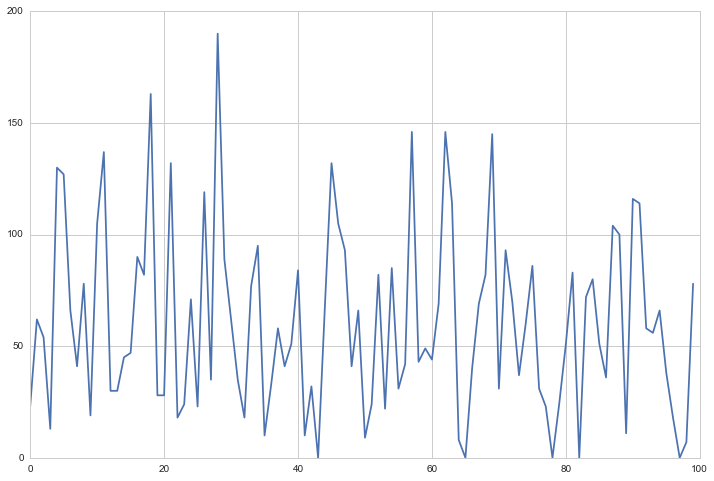

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data[:, 0])
plt.show()

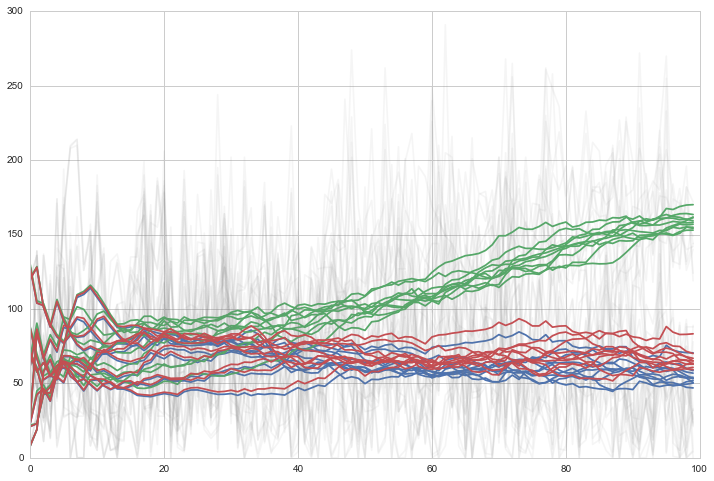

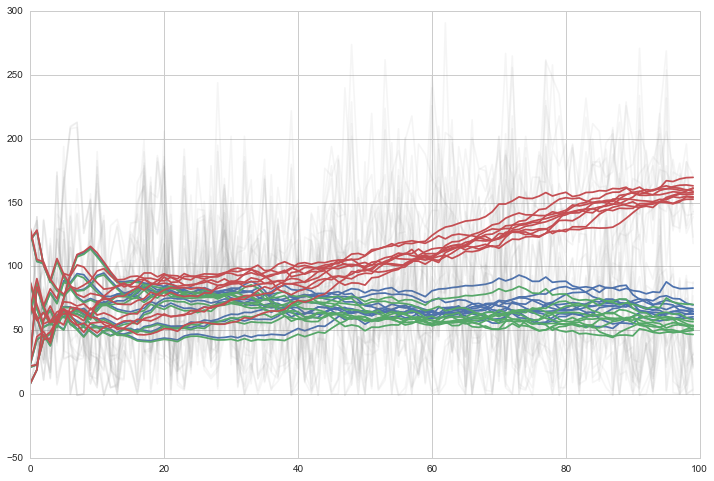

In [16]:
colors = sns.color_palette()

fig = plt.figure()
ax = fig.add_subplot(111)
N = 30

for i in range(3):
    test = data[:, i*10:(i+1)*10]
    ax.plot(test, alpha=0.075, c='grey')
    ax.plot(pd.rolling_mean(test, window=N, min_periods=1), c=colors[i])
plt.show()


 
fig = plt.figure()
ax = fig.add_subplot(111)
testdata = df.xs('>1200', level='second', axis=1).values
testdata = 365-testdata
for i in range(3):
    test = testdata[:, i*10:(i+1)*10]
    ax.plot(test, alpha=0.075, c='grey')
    ax.plot(pd.rolling_mean(test, window=N, min_periods=1),  c=colors[i])
plt.show()


In [75]:
all_data = testdata = df.xs('>1200', level='second', axis=1)
all_data = 365-all_data
all_data = pd.rolling_mean(all_data, window=30, min_periods=14)

In [76]:
all_data.columns

no_change = all_data.loc[:, ['nochange {}'.format(i) for i in range(1,11)]]
wplus = all_data.loc[:, ['Wplus {}'.format(i) for i in range(1,11)]]
g = no_change = all_data.loc[:, ['G {}'.format(i) for i in range(1,11)]]

In [77]:
max_nochange = no_change.max(axis=1)
max_g = g.max(axis=1)
max_both = pd.DataFrame([max_nochange, max_g]).T.max(axis=1)
max_both



In [92]:
a = wplus.values
np.argmax(a>max_both.values[:, np.newaxis], axis=0)

array([28, 22, 13, 43, 16, 13, 14, 35, 17, 35])

In [98]:
print a[43, 9]
print max_both[43]

95.9666666667
75.2


year of emerence from background for each wplus is

[28, 22, 13, 43, 16, 13, 14, 35, 17, 35]

In [101]:
20 % 30

20